In [1]:
#!nvidia-smi

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Loading Libraries

In [319]:
#data management tools
import pandas as pd
import numpy as np

from matplotlib import pyplot

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

import seaborn as sb
import datetime

# #Vectorization and Tokenizing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn import utils
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from keras.wrappers.scikit_learn import KerasClassifier

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

# #DNN Modules
# import torch
# import tensorflow as tf
# from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.layers import InputLayer
# from tensorflow.keras import losses
# from tensorflow.keras.regularizers import L2
# from tensorflow.keras.utils import plot_model
# from tensorflow.keras.layers import TextVectorization

# #Models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC  

# #Metrics and Testing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

import multiprocessing
cores = multiprocessing.cpu_count()

# Dataloading and Preprocessing

In [4]:
#My Lenovo
#df1 = pd.read_csv('/Data/CERT/r4.2/logon.csv')
#df2 = pd.read_csv('/Data/CERT/r4.2/device.csv')
#df3 = pd.read_csv('/Data/CERT/r4.2/email.csv')
#df4 = pd.read_csv('/Data/CERT/r4.2/file.csv')
#df5 = pd.read_csv('/Data/CERT/r4.2/http.csv')
#df6 = pd.read_csv('/Data/CERT/r4.2/psychometric.csv')

#My MacBook
df1 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/logon.csv')
df2 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/device.csv')
df3 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/email.csv')
df4 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/file.csv')
df5 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/http.csv')
ans = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/answers/answers.csv')
ldap = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/ldap/2009-12.csv')
df6 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/psychometric.csv')

#Google Drive - Colab
# df1 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/logon.csv')
# df2 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/device.csv')
# df3 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/http.csv')
# df4 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/email.csv')
# df5 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/file.csv')
# df6 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/psychometric.csv')

In [5]:
START = datetime.date(2010,9,1)
END = datetime.date(2010,10,31)

In [6]:
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])
df3['date'] = pd.to_datetime(df3['date'])
df4['date'] = pd.to_datetime(df4['date'])
df5['date'] = pd.to_datetime(df5['date'])

df1['day_date'] = pd.to_datetime(df1['date']).dt.date
df2['day_date'] = pd.to_datetime(df2['date']).dt.date
df3['day_date'] = pd.to_datetime(df3['date']).dt.date
df4['day_date'] = pd.to_datetime(df4['date']).dt.date
df5['day_date'] = pd.to_datetime(df5['date']).dt.date

In [7]:
df3['activity'] = "email"
df4['activity'] = "file"
df5['activity'] = "http"

In [8]:
df1_bs = df1[((df1['day_date'] >= START) & (df1['day_date'] <= END))]
df2_bs = df2[((df2['day_date'] >= START) & (df2['day_date'] <= END))]
df3_bs = df3[((df3['day_date'] >= START) & (df3['day_date'] <= END))]
df4_bs = df4[((df4['day_date'] >= START) & (df4['day_date'] <= END))]
df5_bs = df5[((df5['day_date'] >= START) & (df5['day_date'] <= END))]

# Stemming Lemmatizing Stopwords Lowercase and Tokenized

In [9]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
def prepare_text(pretext):

    # tokenize mission.
    tokens = word_tokenize(pretext, language="english", preserve_line=True)

    # # Parts of speech (POS) tag tokens.
    # token_tag = pos_tag(tokens)
    
    # # Only include some of the POS tags.
    # include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    # filtered_tokens = (tok for tok, tag in token_tag if tag in include_tags)    
    
    # #stem words.
    # stemmed_tokens = (lancaster.stem(tok) for tok in filtered_tokens)

    # #lemm words.
    # lemmed_words = (lemmatizer.lemmatize(tok) for tok in stemmed_tokens)

    # lower_words = [str.lower(tok) for tok in lemmed_words]

    # joined = ", ".join(lower_words)

    return(tokens)

#ps = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
#df3_bs['df3tokenized'] = df3_bs['content'].apply(prepare_text)
#df4_bs['df4tokenized'] = df4_bs['content'].apply(prepare_text)
df5_bs['df5tokenized'] = df5_bs['content'].apply(prepare_text)

/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_88712/2991701804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_bs['df5tokenized'] = df5_bs['content'].apply(prepare_text)


# TFIDF

In [11]:
# nltk.download('stopwords')
# stops = set(stopwords.words('english'))
# tfidfvectorizer = TfidfVectorizer(stop_words='english', analyzer='word' )

In [12]:
# tfidf_df3 = tfidfvectorizer.fit_transform(df3_bs['df3tokenized'])
# df3_bs['df3tfidf_mean'] = ((tfidf_df3.sum(axis=1).transpose()) / (tfidf_df3.getnnz(axis=1))).transpose()
# df3_bs['df3tfidf_max'] = tfidf_df3.max()

In [13]:
# tfidf_df4 = tfidfvectorizer.fit_transform(df4_bs['df4tokenized'])
# df4_bs['df4tfidf_mean'] = ((tfidf_df4.sum(axis=1).transpose()) / (tfidf_df4.getnnz(axis=1))).transpose()
# df4_bs['df4tfidf_max'] = tfidf_df4.max()

In [14]:
# tfidf_df5 = tfidfvectorizer.fit_transform(df5_bs['df5tokenized'])
# df5_bs['df5tfidf_mean'] = ((tfidf_df5.sum(axis=1).transpose()) / (tfidf_df5.getnnz(axis=1))).transpose()
# #df5_bs['df5tfidf_max'] = tfidf_df5.max()

# Aggregate data

In [15]:
df_merged = pd.concat([df1_bs, df2_bs, df3_bs, df4_bs, df5_bs])

In [16]:
df_merged['label'] = 'normal'

In [17]:
df_merged.loc[df_merged['id'].isin(ans['id']),['label']] = 'bad'

In [18]:
dates = df_merged['day_date']
dates = dates.unique()

In [19]:
# df_merged['df3tokenized'].fillna('', inplace=True)
# df_merged['df4tokenized'].fillna('', inplace=True)
df_merged['df5tokenized'].fillna('', inplace=True)

In [20]:
dfwow = []
for d in dates:
    dayevents = df_merged.loc[(df_merged['day_date'] == d)]
    users = dayevents['user']
    users = users.unique()
    email_text = " "
    file_text = " "
    http_text = " "
    for u in users:
        userd = dayevents[(dayevents['user'] == u)]
        date = d
        username = u
        login_count = userd[userd['activity'] == 'Logon'].shape[0]
        logout_count = userd[userd['activity'] == 'Logoff'].shape[0]
        email_count = userd[userd['activity'] == 'email'].shape[0]
        file_count = userd[userd['activity'] == 'file'].shape[0]
        http_count = userd[userd['activity'] == 'http'].shape[0]
        start_time = userd['date'].iloc[0]
        end_time = userd['date'].iloc[-1]
        # tfidf3_mean = userd['df3tfidf_mean'].mean()
        # tfidf4_mean = userd['df4tfidf_mean'].mean()
        # tfidf5_mean = userd['df5tfidf_mean'].mean()
        #email_text_temp = userd['df3tokenized'].to_list()
        #email_text = [i for s in email_text_temp for i in s]
        #file_text_temp = userd['df4tokenized'].to_list()
        #file_text = [i for s in file_text_temp for i in s]
        http_text_temp = userd['df5tokenized'].to_list()
        http_text = [i for s in http_text_temp for i in s]
        text = http_text 
        if (userd[(userd['label'] == 'bad')].shape[0] > 0): label = 'bad'
        else: label = 'normal'
        dfwow.append([date, username, login_count, logout_count, email_count, file_count, http_count, start_time, end_time, text, label])

In [21]:
final = pd.DataFrame(dfwow, columns=['date', 'username', 'login_count', 'logout_count', 'email_count', 'file_count', 'http_count', 'start_time', 'end_time', 'text', 'label'])

In [22]:
final['start_secs'] = final['start_time'].apply(lambda s: (s - s.replace(hour=0, minute=0, second=0, microsecond=0)).seconds)
final['end_secs'] = final['end_time'].apply(lambda s: (s - s.replace(hour=0, minute=0, second=0, microsecond=0)).seconds)

In [23]:
tagged = final.apply(lambda r: TaggedDocument(words=r['text'], tags=r['username']), axis=1)
# tagged3 = final.apply(lambda r: TaggedDocument(words=r['email_text'], tags=r['username']), axis=1)
# tagged4 = final.apply(lambda r: TaggedDocument(words=r['file_text'], tags=r['username']), axis=1)
# tagged5 = final.apply(lambda r: TaggedDocument(words=r['http_text'], tags=r['username']), axis=1)

In [24]:
model_dbow = Doc2Vec(dm=0, vector_size=20, negative=10, hs=0, min_count=0, sample = 0, workers=cores)

In [25]:
model_dbow.build_vocab([x for x in tqdm(tagged.values)])

100%|██████████| 40097/40097 [00:00<00:00, 3573107.15it/s]


In [26]:
for epoch in range(5):
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha
    model_dbow.train(utils.shuffle([x for x in tqdm(tagged.values)]), total_examples=len(tagged.values), epochs=5)


100%|██████████| 40097/40097 [00:00<00:00, 4304556.12it/s]


In [27]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags, model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors

In [28]:
y, X = vec_for_learning(model_dbow, tagged)

In [29]:
d2v_df = pd.DataFrame(X, columns=['dim1','dim2','dim3','dim4','dim5', 'dim6','dim7','dim8','dim9','dim10', 'dim11','dim12','dim13','dim14','dim15', 'dim16','dim17','dim18','dim19','dim20'])

In [30]:
joined1_df = final.join(d2v_df)

In [31]:
users = joined1_df['username']
users = users.unique()

In [32]:
def Euclidean_Dist_Text(df1, df2, cols=['dim1','dim2','dim3','dim4','dim5','dim6','dim7','dim8','dim9','dim10','dim11','dim12','dim13','dim14','dim15','dim16','dim17','dim18','dim19','dim20']):
    return np.linalg.norm(df1[cols].values - df2[cols].values, axis=1)

In [33]:
def Euclidean_Dist_Activity(df1, df2, cols=['login_count','logout_count','email_count','file_count','http_count','start_secs','end_secs']):
    return np.linalg.norm(df1[cols].values - df2[cols].values, axis=1)

In [34]:
something = pd.DataFrame()
for u in users:
    userevents = joined1_df.loc[(joined1_df['username'] == u)]
    vector_activity = userevents.loc[:, ['login_count', 'logout_count', 'email_count', 'file_count', 'http_count', 'start_secs', 'end_secs']]
    vector_1d_activity = vector_activity.shift()
    vector_1d_activity = vector_1d_activity.rename(columns={'login_count':'login_count_1d', 'logout_count':'logout_count_1d', 'email_count':'email_count_1d', 'file_count':'file_count_1d', 'http_count':'http_count_1d', 'start_secs':'start_secs_1d', 'end_secs':'end_secs_1d'})
    vector_7d_activity = vector_activity.shift(7)
    vector_7d_activity = vector_7d_activity.rename(columns={'login_count':'login_count_7d', 'logout_count':'logout_count_7d', 'email_count':'email_count_7d', 'file_count':'file_count_7d', 'http_count':'http_count_7d', 'start_secs':'start_secs_7d', 'end_secs':'end_secs_7d'})
    vector_text = userevents.loc[:, ['dim1','dim2','dim3','dim4','dim5','dim6','dim7','dim8','dim9','dim10','dim11','dim12','dim13','dim14', 'dim15', 'dim16','dim17','dim18','dim19','dim20']]
    vector_1d_text = vector_text.shift()
    vector_7d_text = vector_text.shift(7)
    #activity_dist = Euclidean_Dist_Activity(vector_activity, vector_1d_activity)
    #activity_dist_7d = Euclidean_Dist_Activity(vector_activity, vector_7d_activity)
    #userevents['activity_distance'] = activity_dist.tolist()
    #userevents['activity_distance_7d'] = activity_dist_7d.tolist()
    text_dist = Euclidean_Dist_Text(vector_text, vector_1d_text)
    text_dist_7d = Euclidean_Dist_Text(vector_text, vector_7d_text)
    userevents['text_distance'] = text_dist.tolist()
    userevents['text_distance_7d'] = text_dist_7d.tolist()
    newuserevents = userevents.filter(['username', 'date', 'text_distance', 'text_distance_7d'])
    newuserevents = newuserevents.join(vector_1d_activity)
    newuserevents = newuserevents.join(vector_7d_activity)
    something = pd.concat([something, newuserevents])

    

/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_88712/2017195961.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userevents['text_distance'] = text_dist.tolist()
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_88712/2017195961.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userevents['text_distance_7d'] = text_dist_7d.tolist()
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_88712/2017195961.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [35]:
final_individual_deltas_join_df = pd.merge(joined1_df, something, on=['username', 'date'], how='left')

In [36]:
final_individual_deltas_join_df['login_count_1d'] = (final_individual_deltas_join_df['login_count'] - final_individual_deltas_join_df['login_count_1d'])
final_individual_deltas_join_df['logout_count_1d'] = (final_individual_deltas_join_df['logout_count'] - final_individual_deltas_join_df['logout_count_1d'])
final_individual_deltas_join_df['email_count_1d'] = (final_individual_deltas_join_df['email_count'] - final_individual_deltas_join_df['email_count_1d'])
final_individual_deltas_join_df['file_count_1d'] = (final_individual_deltas_join_df['file_count'] - final_individual_deltas_join_df['file_count_1d'])
final_individual_deltas_join_df['http_count_1d'] = (final_individual_deltas_join_df['http_count'] - final_individual_deltas_join_df['http_count_1d'])
final_individual_deltas_join_df['start_secs_1d'] = (final_individual_deltas_join_df['start_secs'] - final_individual_deltas_join_df['start_secs_1d'])
final_individual_deltas_join_df['end_secs_1d'] = (final_individual_deltas_join_df['end_secs'] - final_individual_deltas_join_df['end_secs_1d'])

final_individual_deltas_join_df['login_count_7d'] = (final_individual_deltas_join_df['login_count'] - final_individual_deltas_join_df['login_count_7d'])
final_individual_deltas_join_df['logout_count_7d'] = (final_individual_deltas_join_df['logout_count'] - final_individual_deltas_join_df['logout_count_7d'])
final_individual_deltas_join_df['email_count_7d'] = (final_individual_deltas_join_df['email_count'] - final_individual_deltas_join_df['email_count_7d'])
final_individual_deltas_join_df['file_count_7d'] = (final_individual_deltas_join_df['file_count'] - final_individual_deltas_join_df['file_count_7d'])
final_individual_deltas_join_df['http_count_7d'] = (final_individual_deltas_join_df['http_count'] - final_individual_deltas_join_df['http_count_7d'])
final_individual_deltas_join_df['start_secs_7d'] = (final_individual_deltas_join_df['start_secs'] - final_individual_deltas_join_df['start_secs_7d'])
final_individual_deltas_join_df['end_secs_7d'] = (final_individual_deltas_join_df['end_secs'] - final_individual_deltas_join_df['end_secs_7d'])

In [37]:
#We drop the first 7 days of activity for the user so it does not skew the distance calculation.
users = final_individual_deltas_join_df['username']
users = users.unique()
for u in users:
    userIndex = final_individual_deltas_join_df[(final_individual_deltas_join_df['username'] == u)].index.values[:7]
    final_individual_deltas_join_df.drop(userIndex , inplace=True)

In [38]:
ldap = ldap.rename(columns={'user_id': 'username'})
joined_df = pd.merge(final_individual_deltas_join_df, ldap, on='username', how='left')

In [39]:
label_encoder = LabelEncoder()

In [40]:
joined_df['username'] = label_encoder.fit_transform(joined_df['username'])
joined_df['department'] = label_encoder.fit_transform(joined_df['department'])

In [41]:
depts = joined_df['department']
depts = depts.unique()

Compute Department means for the previous 30 days

In [42]:
dept_means = []
for d in depts:
    dept_events = joined_df.loc[(joined_df['department'] == d)]
    department = d
    login_mean = dept_events['login_count'].mean()
    logout_mean = dept_events['logout_count'].mean()
    http_mean = dept_events['http_count'].mean()
    file_mean = dept_events['file_count'].mean()
    email_mean = dept_events['logout_count'].mean()
    start_mean = dept_events['start_secs'].mean()
    end_mean = dept_events['end_secs'].mean()
    dept_means.append([department, login_mean, logout_mean, email_mean, file_mean, http_mean, start_mean, end_mean])
dept_events_df = pd.DataFrame(dept_means, columns=['department', 'login_mean', 'logout_mean', 'email_mean', 'file_mean', 'http_mean', 'start_mean', 'end_mean'])
last_joined_df = pd.merge(joined_df, dept_events_df, on='department', how='left')

In [43]:
#use this if we are going to compare activity as a vector to the department's means
#last_joined_means_df = last_joined_df.loc[:, ['login_mean', 'logout_mean', 'email_mean', 'file_mean', 'http_mean', 'start_mean', 'end_mean']]
#last_joined_means_df = last_joined_means_df.rename(columns={'login_mean': 'login_count', 'logout_mean': 'logout_count', 'email_mean': 'email_count', 'file_mean': 'file_count', 'http_mean': 'http_count', 'start_mean': 'start_secs', 'end_mean': 'end_secs'})
# last_joined_inv_df = last_joined_df.loc[:, ['login_count', 'logout_count', 'email_count', 'file_count', 'http_count', 'start_secs', 'end_secs']]
# dept_activity_dist = Euclidean_Dist_Activity(last_joined_means_df, last_joined_inv_df)
# last_joined_df['dept_activity_distance'] = dept_activity_dist.tolist()



In [44]:
last_joined_df['login_diff_to_dept'] = (last_joined_df['login_count'] - last_joined_df['login_mean'])
last_joined_df['logout_diff_to_dept'] = (last_joined_df['logout_count'] - last_joined_df['logout_mean'])
last_joined_df['email_diff_to_dept'] = (last_joined_df['email_count'] - last_joined_df['email_mean'])
last_joined_df['file_diff_to_dept'] = (last_joined_df['file_count'] - last_joined_df['file_mean'])
last_joined_df['http_diff_to_dept'] = (last_joined_df['http_count'] - last_joined_df['http_mean'])
last_joined_df['start_diff_to_dept'] = (last_joined_df['start_secs'] - last_joined_df['start_mean'])
last_joined_df['end_diff_to_dept'] = (last_joined_df['end_secs'] - last_joined_df['end_mean'])

In [45]:
#setting up labels so they can be used with ML algorithms.
last_joined_df.loc[last_joined_df['label'] == 'normal', 'label'] = 0
last_joined_df.loc[last_joined_df['label'] == 'bad', 'label'] = 1
last_joined_df['label'] = last_joined_df['label'].astype('int64')

# Sampling Methods

<Axes: xlabel='label', ylabel='count'>

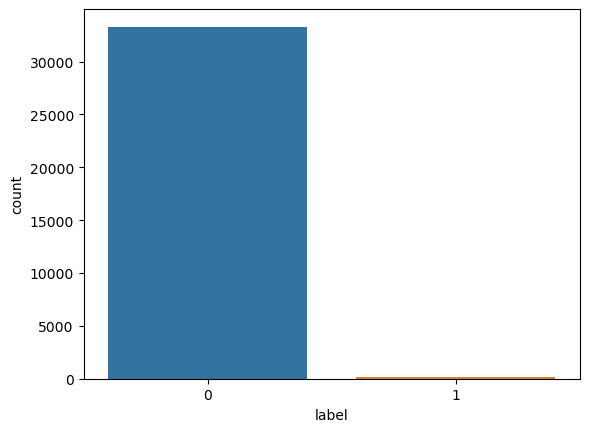

In [46]:
sb.countplot(data=last_joined_df, x='label')

In [47]:
print("Number of malicious records: ", last_joined_df['label'].value_counts()[1])
print("Number of normal records: ", last_joined_df['label'].value_counts()[0])

Number of malicious records:  186
Number of normal records:  33301


In [48]:
last_joined_df.dropna(inplace=True)

In [49]:
last_joined_df.columns

Index(['date', 'username', 'login_count', 'logout_count', 'email_count',
       'file_count', 'http_count', 'start_time', 'end_time', 'text', 'label',
       'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
       'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
       'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
       'text_distance', 'text_distance_7d', 'login_count_1d',
       'logout_count_1d', 'email_count_1d', 'file_count_1d', 'http_count_1d',
       'start_secs_1d', 'end_secs_1d', 'login_count_7d', 'logout_count_7d',
       'email_count_7d', 'file_count_7d', 'http_count_7d', 'start_secs_7d',
       'end_secs_7d', 'employee_name', 'email', 'role', 'business_unit',
       'functional_unit', 'department', 'team', 'supervisor', 'login_mean',
       'logout_mean', 'email_mean', 'file_mean', 'http_mean', 'start_mean',
       'end_mean', 'login_diff_to_dept', 'logout_diff_to_dept',
       'email_diff_to_dept', 'file_diff_to_dept', 

In [50]:
X = last_joined_df.loc[:, ['date', 'username', 'login_count', 'logout_count', 'email_count',
       'file_count', 'http_count', 'start_time', 'end_time', 'text', 'label',
       'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
       'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
       'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
       'text_distance', 'text_distance_7d', 'login_count_1d',
       'logout_count_1d', 'email_count_1d', 'file_count_1d', 'http_count_1d',
       'start_secs_1d', 'end_secs_1d', 'login_count_7d', 'logout_count_7d',
       'email_count_7d', 'file_count_7d', 'http_count_7d', 'start_secs_7d',
       'end_secs_7d', 'employee_name', 'email', 'role', 'business_unit',
       'functional_unit', 'department', 'team', 'supervisor', 'login_mean',
       'logout_mean', 'email_mean', 'file_mean', 'http_mean', 'start_mean',
       'end_mean', 'login_diff_to_dept', 'logout_diff_to_dept',
       'email_diff_to_dept', 'file_diff_to_dept', 'http_diff_to_dept',
       'start_diff_to_dept', 'end_diff_to_dept']]

In [51]:
y = last_joined_df['label']

In [52]:
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [198]:
X_train = X_train1.loc[:, ['login_count', 'logout_count', 'email_count',
       'file_count', 'http_count',
       'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
       'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
       'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
       'text_distance', 'text_distance_7d', 'login_count_1d',
       'logout_count_1d', 'email_count_1d', 'file_count_1d', 'http_count_1d',
       'start_secs_1d', 'end_secs_1d', 'login_count_7d', 'logout_count_7d',
       'email_count_7d', 'file_count_7d', 'http_count_7d', 'start_secs_7d',
       'end_secs_7d', 'login_diff_to_dept', 'logout_diff_to_dept',
       'email_diff_to_dept', 'file_diff_to_dept', 'http_diff_to_dept',
       'start_diff_to_dept', 'end_diff_to_dept']
       ]

In [199]:
X_test = X_test1.loc[:, ['login_count', 'logout_count', 'email_count',
       'file_count', 'http_count',
       'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
       'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
       'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
       'text_distance', 'text_distance_7d', 'login_count_1d',
       'logout_count_1d', 'email_count_1d', 'file_count_1d', 'http_count_1d',
       'start_secs_1d', 'end_secs_1d', 'login_count_7d', 'logout_count_7d',
       'email_count_7d', 'file_count_7d', 'http_count_7d', 'start_secs_7d',
       'end_secs_7d', 'login_diff_to_dept', 'logout_diff_to_dept',
       'email_diff_to_dept', 'file_diff_to_dept', 'http_diff_to_dept',
       'start_diff_to_dept', 'end_diff_to_dept']
       ]

In [200]:
# X_train = X_train1.loc[:, ['login_count', 'logout_count', 'email_count',
#        'file_count', 'http_count',
#        'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
#        'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
#        'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
#        'login_diff_to_dept', 'logout_diff_to_dept',
#        'email_diff_to_dept', 'file_diff_to_dept', 'http_diff_to_dept',
#        'start_diff_to_dept', 'end_diff_to_dept']
#        ]

In [201]:
# X_test = X_test1.loc[:, ['login_count', 'logout_count', 'email_count',
#        'file_count', 'http_count',
#        'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
#        'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
#        'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
#        'login_diff_to_dept', 'logout_diff_to_dept',
#        'email_diff_to_dept', 'file_diff_to_dept', 'http_diff_to_dept',
#        'start_diff_to_dept', 'end_diff_to_dept'
#        ]]

In [202]:
# X_train = X_train1.loc[:, ['login_count', 'logout_count', 'email_count',
#        'file_count', 'http_count',
#        'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
#        'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
#        'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',]
#        ]

In [203]:
# X_test = X_test1.loc[:, ['login_count', 'logout_count', 'email_count',
#        'file_count', 'http_count',
#        'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
#        'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
#        'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
# ]]

In [204]:
sc = StandardScaler()

In [205]:
X_train = X_train.reset_index()
X_test = X_test.reset_index()
y_train = y_train.reset_index()
y_test = y_test.reset_index()

In [206]:
X_train.drop(['index'], axis=1, inplace=True)
X_test.drop(['index'], axis=1, inplace=True)

y_train.drop(['index'], axis=1, inplace=True)
y_test.drop(['index'], axis=1, inplace=True)

In [207]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [208]:


X_train = pd.DataFrame(X_train, columns=[
       'login_count', 'logout_count', 'email_count',
       'file_count', 'http_count',
       'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
       'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
       'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
       'text_distance', 'text_distance_7d', 'login_count_1d',
       'logout_count_1d', 'email_count_1d', 'file_count_1d', 'http_count_1d',
       'start_secs_1d', 'end_secs_1d', 'login_count_7d', 'logout_count_7d',
       'email_count_7d', 'file_count_7d', 'http_count_7d', 'start_secs_7d',
       'end_secs_7d', 'login_diff_to_dept', 'logout_diff_to_dept',
       'email_diff_to_dept', 'file_diff_to_dept', 'http_diff_to_dept',
       'start_diff_to_dept', 'end_diff_to_dept'])

X_test = pd.DataFrame(X_test, columns=['login_count', 'logout_count', 'email_count',
       'file_count', 'http_count',
       'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
       'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
       'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
       'text_distance', 'text_distance_7d', 'login_count_1d',
       'logout_count_1d', 'email_count_1d', 'file_count_1d', 'http_count_1d',
       'start_secs_1d', 'end_secs_1d', 'login_count_7d', 'logout_count_7d',
       'email_count_7d', 'file_count_7d', 'http_count_7d', 'start_secs_7d',
       'end_secs_7d', 'login_diff_to_dept', 'logout_diff_to_dept',
       'email_diff_to_dept', 'file_diff_to_dept', 'http_diff_to_dept',
       'start_diff_to_dept', 'end_diff_to_dept'])



# X_train = pd.DataFrame(X_train, columns=[
#        'login_count', 'logout_count', 'email_count',
#        'file_count', 'http_count',
#        'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
#        'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
#        'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
#        'login_diff_to_dept', 'logout_diff_to_dept',
#        'email_diff_to_dept', 'file_diff_to_dept', 'http_diff_to_dept',
#        'start_diff_to_dept', 'end_diff_to_dept'])

# X_test = pd.DataFrame(X_test, columns=['login_count', 'logout_count', 'email_count',
#        'file_count', 'http_count',
#        'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
#        'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
#        'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
#        'login_diff_to_dept', 'logout_diff_to_dept',
#        'email_diff_to_dept', 'file_diff_to_dept', 'http_diff_to_dept',
#        'start_diff_to_dept', 'end_diff_to_dept'])

# X_train = pd.DataFrame(X_train, columns=[
#        'login_count', 'logout_count', 'email_count',
#        'file_count', 'http_count',
#        'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
#        'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
#        'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
#        ])

# X_test = pd.DataFrame(X_test, columns=['login_count', 'logout_count', 'email_count',
#        'file_count', 'http_count',
#        'start_secs', 'end_secs', 'dim1', 'dim2', 'dim3', 'dim4', 'dim5',
#        'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13',
#        'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20',
#        ])


In [209]:
final_undersample = RandomUnderSampler(sampling_strategy='majority')
X_final_under, y_final_under = final_undersample.fit_resample(X_train, y_train)

In [210]:
final_oversample = RandomOverSampler(sampling_strategy='minority')
X_final_over, y_final_over = final_oversample.fit_resample(X_train, y_train)

In [211]:
final_smote = SMOTE(k_neighbors=10)
X_final_smote, y_final_smote = final_smote.fit_resample(X_train, y_train)

In [212]:
final_blsmote = BorderlineSMOTE(k_neighbors=10)
X_final_blsmote, y_final_blsmote = final_blsmote.fit_resample(X_train, y_train)

In [213]:
final_adasyn = ADASYN(n_neighbors=5)
X_final_adasyn, y_final_adasyn = final_adasyn.fit_resample(X_train, y_train)

In [214]:
final_under = X_final_under.copy()
final_over = X_final_over.copy()
final_smote = X_final_smote.copy()
final_blsmote = X_final_blsmote.copy()
final_adasyn = X_final_adasyn.copy()

In [215]:
final_under['label'] = y_final_under
final_over['label'] = y_final_over
final_smote['label'] = y_final_smote
final_blsmote['label'] = y_final_blsmote
final_adasyn['label'] = y_final_adasyn

In [216]:
# sb.displot(data=final_adasyn, x="start_delta", y='ind_start_secs_delta', hue="label", kind='kde')

In [217]:
# sb.pairplot(X)

In [218]:
#C is the most meaningful - penalty would error out
# param_grid = {'C': [0.1,1, 10, 100], 'max_iter': [1000]}
# grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0,cv=10,scoring='recall', return_train_score=False)
# grid.fit(X_train,y_train.values.ravel())
# print("LR best estimater: ", grid.best_estimator_)
# print("LR Best parameters:", grid.best_params_)
# nosample_lr_best_est = grid.best_estimator_

In [219]:

#linear failed to converge
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly']}
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0, cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train,y_train.values.ravel())
# print("SVM best estimater: ", grid.best_estimator_)
# print("SVM Best parameters:", grid.best_params_)
# nosample_svm_best_est = grid.best_estimator_


In [220]:

# param_grid = {'n_neighbors': list(range(1,21)), 'metric': ['euclidean', 'manhattan', 'minkowski'], 'weights': ['uniform', 'distance'] }
# grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train,y_train.values.ravel())
# print("KNN best estimater: ", grid.best_estimator_)
# print("KNN Best parameters:", grid.best_params_)
# nosample_knn_best_est = grid.best_estimator_


In [221]:

# param_grid = {
#     'n_estimators': [10, 50, 100],
#     'max_depth': [3, 5, None],
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid = GridSearchCV(RandomForestClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train, y_train.values.ravel())
# print("RF Best estimater:", grid.best_estimator_)
# print("RF Best parameters:", grid.best_params_)
# nosample_rf_best_est = grid.best_estimator_


In [222]:

# param_grid = {
#      'n_estimators': [100, 200, 300],
#      'learning_rate': [0.01, 0.05, 0.1, 1],
#  }
# grid = GridSearchCV(AdaBoostClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train, y_train.values.ravel())
# print("ADA Best estimater:", grid.best_estimator_)
# print("ADA Best parameters:", grid.best_params_)
# nosample_ada_best_est = grid.best_estimator_


In [223]:
#These are the default parameters for these ML algorithms.
lr = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()

In [224]:
results_no_sample = []
models = [lr, svm, knn, rf, ada]
for m in models:
    m.fit(X_train, y_train.values.ravel())
    predicted = m.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    results_no_sample.append([acc, rec])


/opt/anaconda3/envs/Praxis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [225]:
# X_numpy_nosample = np.expand_dims(X_train.values[:,:],axis = 2)
# y_numpy_nosample = y_train.values[:]
# X_numpy_nosample_test = np.expand_dims(X_test.values[:,:],axis = 2)
# y_numpy_nosample_test = y_test.values[:]
# model = Sequential()
# model.add(LSTM(units=64, return_sequences=True, input_shape=(len(X_train.columns), 1)))
# model.add(LSTM(units=128, return_sequences=True))
# model.add(LSTM(units=256, return_sequences=False))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy', 'Recall'])
# model.fit(X_numpy_nosample, y_numpy_nosample, epochs=6, batch_size=128, validation_data=(X_numpy_nosample_test, y_numpy_nosample_test))


In [226]:

# X_numpy = np.expand_dims(X_test.values[:],axis = 2)
# y_numpy = y_test.values[:]
# ypred = model.predict(X_numpy)
# predlabels = [int(p>=0.5) for p in ypred]
# acc = metrics.accuracy_score(y_test, predlabels)
# rec = metrics.recall_score(y_test, predlabels)
# cf_matrix = metrics.confusion_matrix(y_test,predlabels)
# print(cf_matrix)
# print("LSTM Accuracy:", acc)
# print("LSTM Recall:", rec)
# results_no_sample.append([acc, rec])
# cf_matrix = metrics.confusion_matrix(y_test,predlabels)
print(results_no_sample)

[[0.9944884602135722, 0.04], [0.994258812722471, 0.0], [0.994258812722471, 0.0], [0.9972442301067861, 0.52], [0.9973590538523367, 0.58]]


# Underfitting

In [227]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_final_under, y_final_under, test_size=0.3)

In [228]:
# #C is the most meaningful - penalty had no impact and would error out
# param_grid = {'C': [0.1,1, 10, 100], 'max_iter': [1000]}
# grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0,cv=10,scoring='recall', return_train_score=False)
# grid.fit(X_train_under,y_train_under.values.ravel())
# print("LR best estimater: ", grid.best_estimator_)
# print("LR Best parameters:", grid.best_params_)
# under_lr_best_est = grid.best_estimator_


In [229]:

# #linear failed to converge 
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly']}
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0, cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_under,y_train_under.values.ravel())
# print("SVM best estimater: ", grid.best_estimator_)
# print("SVM Best parameters:", grid.best_params_)
# under_svm_best_est = grid.best_estimator_



In [230]:

# param_grid = {'n_neighbors': list(range(1,21)), 'metric': ['euclidean', 'manhattan', 'minkowski'], 'weights': ['uniform', 'distance'] }
# grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_under,y_train_under.values.ravel())
# print("KNN best estimater: ", grid.best_estimator_)
# print("KNN Best parameters:", grid.best_params_)
# under_knn_best_est = grid.best_estimator_


In [231]:

# param_grid = {
#     'n_estimators': [10, 50, 100],
#     'max_depth': [3, 5, None],
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid = GridSearchCV(RandomForestClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_under, y_train_under.values.ravel())
# print("RF Best estimater:", grid.best_estimator_)
# print("RF Best parameters:", grid.best_params_)
# under_rf_best_est = grid.best_estimator_



In [232]:

# param_grid = {
#      'n_estimators': [100, 200, 300],
#      'learning_rate': [0.01, 0.05, 0.1, 1],
#  }
# grid = GridSearchCV(AdaBoostClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_under, y_train_under.values.ravel())
# print("ADA Best estimater:", grid.best_estimator_)
# print("ADA Best parameters:", grid.best_params_)
# under_ada_best_est = grid.best_estimator_


In [233]:
#These are the default parameters for these ML algorithms.
lr = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()


In [234]:
results_under = []
models = [lr, svm, knn, rf, ada]
for m in models:
    m.fit(X_train_under, y_train_under.values.ravel())
    predicted = m.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    results_under.append([acc, rec])

In [235]:
# X_numpy_under = np.expand_dims(X_train_under.values[:,:],axis = 2)
# y_numpy_under = y_train_under.values[:]
# X_numpy_under_test = np.expand_dims(X_test_under.values[:,:],axis = 2)
# y_numpy_under_test = y_test_under.values[:]
# model = Sequential()
# model.add(LSTM(units=64, return_sequences=True, input_shape=(len(X_train.columns), 1)))
# model.add(LSTM(units=128, return_sequences=True))
# model.add(LSTM(units=256, return_sequences=False))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy', 'Recall'])
# model.fit(X_numpy_under, y_numpy_under, epochs=6, batch_size=128, validation_data=(X_numpy_under_test, y_numpy_under_test))

# X_numpy = np.expand_dims(X_test.values[:],axis = 2)
# y_numpy = y_test.values[:]
# ypred = model.predict(X_numpy)
# predlabels = [int(p>=0.5) for p in ypred]
# acc = metrics.accuracy_score(y_test, predlabels)
# rec = metrics.recall_score(y_test, predlabels)
# print("LSTM Accuracy:", acc)
# print("LSTM Recall:", rec)
# cf_matrix = metrics.confusion_matrix(y_test,predlabels)
# print(cf_matrix)
# results_under.append([metrics.accuracy_score(y_test, predicted), metrics.recall_score(y_test, predlabels)])
print(results_under)

[[0.7555402457228155, 0.78], [0.7935469055000575, 0.8], [0.7819497071994489, 0.82], [0.9055000574118728, 0.92], [0.8712825812378, 0.98]]


# Overfitting

In [236]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_final_over, y_final_over, test_size=0.3)


In [237]:
# #C is the most meaningful - penalty had no impact and would error out
# param_grid = {'C': [0.1,1, 10, 100], 'max_iter': [1000]}
# grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0,cv=10,scoring='recall', return_train_score=False)
# grid.fit(X_train_over,y_train_over.values.ravel())
# print("LR best estimater: ", grid.best_estimator_)
# print("LR Best parameters:", grid.best_params_)
# over_lr_best_est = grid.best_estimator_



In [238]:
# #linear failed to converge 
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly']}
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0, cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_over,y_train_over.values.ravel())
# print("SVM best estimater: ", grid.best_estimator_)
# print("SVM Best parameters:", grid.best_params_)
# over_svm_best_est = grid.best_estimator_

In [239]:

# param_grid = {'n_neighbors': list(range(1,21)), 'metric': ['euclidean', 'manhattan', 'minkowski'], 'weights': ['uniform', 'distance'] }
# grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_over,y_train_over.values.ravel())
# print("KNN best estimater: ", grid.best_estimator_)
# print("KNN Best parameters:", grid.best_params_)
# over_knn_best_est = grid.best_estimator_


In [240]:
# param_grid = {
#     'n_estimators': [10, 50, 100],
#     'max_depth': [3, 5, None],
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid = GridSearchCV(RandomForestClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_over, y_train_over.values.ravel())
# print("RF Best estimater:", grid.best_estimator_)
# print("RF Best parameters:", grid.best_params_)
# over_rf_best_est = grid.best_estimator_


In [241]:

# param_grid = {
#      'n_estimators': [100, 200, 300],
#      'learning_rate': [0.01, 0.05, 0.1, 1],
#  }
# grid = GridSearchCV(AdaBoostClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_over, y_train_over.values.ravel())
# print("ADA Best estimater:", grid.best_estimator_)
# print("ADA Best parameters:", grid.best_params_)
# over_ada_best_est = grid.best_estimator_


In [323]:
# #Adapt from above
lr = LogisticRegression(max_iter=1000)
svm = SVC(probability=True)
# knn = bls_knn_best_est
# rf = bls_rf_best_est
# ada = bls_ada_best_est

Epoch 1/6
222/222 [==============================] - 25s 96ms/step - loss: 0.5353 - auc: 0.7897 - accuracy: 0.7183 - recall: 0.7659 - val_loss: 0.4166 - val_auc: 0.8704 - val_accuracy: 0.7881 - val_recall: 0.9364
Epoch 2/6
222/222 [==============================] - 20s 92ms/step - loss: 0.3504 - auc: 0.9087 - accuracy: 0.8372 - recall: 0.9610 - val_loss: 0.4293 - val_auc: 0.8831 - val_accuracy: 0.7997 - val_recall: 0.9666
Epoch 3/6
222/222 [==============================] - 20s 92ms/step - loss: 0.2349 - auc: 0.9606 - accuracy: 0.9022 - recall: 0.9784 - val_loss: 0.2046 - val_auc: 0.9672 - val_accuracy: 0.9261 - val_recall: 0.9871
Epoch 4/6
222/222 [==============================] - 20s 92ms/step - loss: 0.1319 - auc: 0.9849 - accuracy: 0.9580 - recall: 0.9901 - val_loss: 0.2059 - val_auc: 0.9777 - val_accuracy: 0.9332 - val_recall: 0.9082
Epoch 5/6
222/222 [==============================] - 21s 93ms/step - loss: 0.0889 - auc: 0.9918 - accuracy: 0.9730 - recall: 0.9919 - val_loss: 0.06

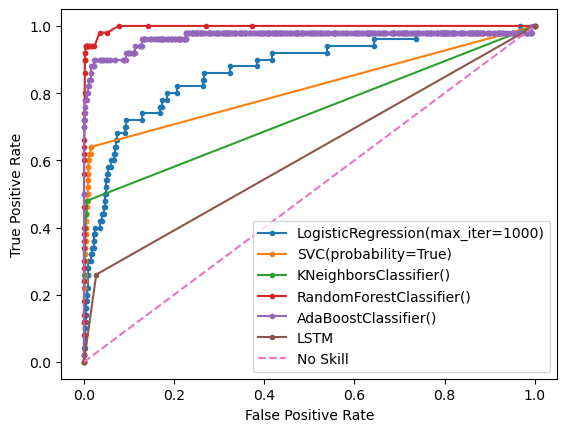

In [324]:
results_over = []
models = [lr, svm, knn, rf, ada]
for m in models:
    m.fit(X_train_over, y_train_over.values.ravel())
    predicted = m.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    results_over.append([acc, rec])
    m_probs = m.predict_proba(X_test)
    m_probs = m_probs[:, 1]
    m_fpr, m_tpr, _ = roc_curve(y_test, m_probs)
    pyplot.plot(m_fpr, m_tpr, marker='.', label=(m))

X_numpy_over = np.expand_dims(X_train_over.values[:,:],axis = 2)
y_numpy_over = y_train_over.values[:]
X_numpy_over_test = np.expand_dims(X_test_over.values[:,:],axis = 2)
y_numpy_over_test = y_test_over.values[:]
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(len(X_train.columns), 1)))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy', 'Recall'])
model.fit(X_numpy_over, y_numpy_over, epochs=6, batch_size=128, validation_data=(X_numpy_over_test, y_numpy_over_test))

X_numpy = np.expand_dims(X_test.values[:],axis = 2)
y_numpy = y_test.values[:]
ypred = model.predict(X_numpy).ravel()
predlabels = [int(p>=0.5) for p in ypred]
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, predlabels)

pyplot.plot(fpr_keras, tpr_keras, marker='.', label=("LSTM"))

ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()



In [244]:
# X_numpy_over = np.expand_dims(X_train_over.values[:,:],axis = 2)
# y_numpy_over = y_train_over.values[:]
# X_numpy_over_test = np.expand_dims(X_test_over.values[:,:],axis = 2)
# y_numpy_over_test = y_test_over.values[:]
# model = Sequential()
# model.add(LSTM(units=64, return_sequences=True, input_shape=(len(X_train.columns), 1)))
# model.add(LSTM(units=128, return_sequences=True))
# model.add(LSTM(units=256, return_sequences=False))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy', 'Recall'])
# model.fit(X_numpy_over, y_numpy_over, epochs=6, batch_size=128, validation_data=(X_numpy_over_test, y_numpy_over_test))

# X_numpy = np.expand_dims(X_test.values[:],axis = 2)
# y_numpy = y_test.values[:]
# ypred = model.predict(X_numpy)
# predlabels = [int(p>=0.5) for p in ypred]
# acc = metrics.accuracy_score(y_test, predlabels)
# rec = metrics.recall_score(y_test, predlabels)
# print("LSTM Accuracy:", acc)
# print("LSTM Recall:", rec)
# cf_matrix = metrics.confusion_matrix(y_test,predlabels)
# print(cf_matrix)
# results_over.append([acc, rec])
print(results_over)

[[0.835457572626019, 0.74], [0.99207716155701, 0.4], [0.9926512802847629, 0.44], [0.9966701113790332, 0.46], [0.9900103341370996, 0.82]]


# SMOTE

In [245]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_final_smote, y_final_smote, test_size=0.3)

In [246]:
# #C is the most meaningful - penalty had no impact and would error out
# param_grid = {'C': [0.1,1, 10, 100], 'max_iter': [1000]}
# grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0,cv=10,scoring='recall', return_train_score=False)
# grid.fit(X_train_smote,y_train_smote.values.ravel())
# print("logistic regression best: ", grid.best_estimator_)
# smote_lr_best_est = grid.best_estimator_



In [247]:
# #linear failed to converge
# param_grid = {'C': [1], 'gamma': ['auto'],'kernel': ['rbf']}
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0, cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_smote,y_train_smote.values.ravel())
# print("SVM best: ", grid.best_estimator_)
# smote_svm_best_est = grid.best_estimator_

In [248]:

# param_grid = {'n_neighbors': list(range(1,21)), 'metric': ['euclidean', 'manhattan', 'minkowski'], 'weights': ['uniform', 'distance'] }
# grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_smote,y_train_smote.values.ravel())
# print("KNN best: ", grid.best_estimator_)
# smote_knn_best_est = grid.best_estimator_

In [249]:

# param_grid = {
#     'n_estimators': [10, 50, 100],
#     'max_depth': [3, 5, None],
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid = GridSearchCV(RandomForestClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_smote, y_train_smote.values.ravel())
# print("RF Best estimater:", grid.best_estimator_)
# print("RF Best parameters:", grid.best_params_)
# print("RF Best score:", grid.best_score_)
# smote_rf_best_est = grid.best_estimator_


In [250]:
# param_grid = {
#      'n_estimators': [100, 200, 300],
#      'learning_rate': [0.01, 0.05, 0.1, 1],
#  }
# grid = GridSearchCV(AdaBoostClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_smote, y_train_smote.values.ravel())
# print("ADA Best estimater:", grid.best_estimator_)
# print("ADA Best parameters:", grid.best_params_)
# print("ADA Best score:", grid.best_score_)
# smote_ada_best_est = grid.best_estimator_

In [251]:
#These are the default parameters for these ML algorithms.
lr = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()

In [252]:
results_smote = []
models = [lr, svm, knn, rf, ada]
for m in models:
    m.fit(X_train_smote, y_train_smote.values.ravel())
    predicted = m.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    results_smote.append([acc, rec])


/opt/anaconda3/envs/Praxis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [253]:
# X_numpy_smote = np.expand_dims(X_train_smote.values[:,:],axis = 2)
# y_numpy_smote = y_train_smote.values[:]
# X_numpy_smote_test = np.expand_dims(X_test_smote.values[:,:],axis = 2)
# y_numpy_smote_test = y_test_smote.values[:]
# model = Sequential()
# model.add(LSTM(units=64, return_sequences=True, input_shape=(len(X_train.columns), 1)))
# model.add(LSTM(units=128, return_sequences=True))
# model.add(LSTM(units=256, return_sequences=False))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy', 'Recall'])
# model.fit(X_numpy_smote, y_numpy_smote, epochs=6, batch_size=128, validation_data=(X_numpy_smote_test, y_numpy_smote_test))

# X_numpy = np.expand_dims(X_test.values[:],axis = 2)
# y_numpy = y_test.values[:]
# ypred = model.predict(X_numpy)
# predlabels = [int(p>=0.5) for p in ypred]
# acc = metrics.accuracy_score(y_test, predlabels)
# rec = metrics.recall_score(y_test, predlabels)
# print("LSTM Accuracy:", acc)
# print("LSTM Recall:", rec)
# cf_matrix = metrics.confusion_matrix(y_test,predlabels)
# print(cf_matrix)
# results_smote.append([metrics.accuracy_score(y_test, predicted), metrics.recall_score(y_test, predlabels)])
print(results_smote)

[[0.8485474796187852, 0.76], [0.992880927775864, 0.4], [0.9702606499023998, 0.76], [0.4781260764726145, 0.94], [0.11849810540819841, 0.98]]


# ADASYN

In [254]:
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_final_adasyn, y_final_adasyn, test_size=0.3)

In [255]:
# #C is the most meaningful - penalty had no impact and would error out
# param_grid = {'C': [0.1,1, 10, 100], 'max_iter': [1000]}
# grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0,cv=10,scoring='recall', return_train_score=False)
# grid.fit(X_train_adasyn,y_train_adasyn.values.ravel())
# print("logistic regression best: ", grid.best_estimator_)
# ada_lr_best_est = grid.best_estimator_



In [256]:

# #linear failed to converge
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly']}
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0, cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_adasyn,y_train_adasyn.values.ravel())
# print("SVM best: ", grid.best_estimator_)
# ada_svm_best_est = grid.best_estimator_



In [257]:

# param_grid = {'n_neighbors': list(range(1,21)), 'metric': ['euclidean', 'manhattan', 'minkowski'], 'weights': ['uniform', 'distance'] }
# grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_adasyn,y_train_adasyn.values.ravel())
# print("KNN best: ", grid.best_estimator_)
# ada_knn_best_est = grid.best_estimator_



In [258]:

# param_grid = {
#     'n_estimators': [10, 50, 100],
#     'max_depth': [3, 5, None],
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid = GridSearchCV(RandomForestClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_adasyn, y_train_adasyn.values.ravel())
# print("RF Best estimater:", grid.best_estimator_)
# print("RF Best parameters:", grid.best_params_)
# print("RF Best score:", grid.best_score_)
# ada_rf_best_est = grid.best_estimator_


In [259]:

# param_grid = {
#      'n_estimators': [100, 200, 300],
#      'learning_rate': [0.01, 0.05, 0.1, 1],
#  }
# grid = GridSearchCV(AdaBoostClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_adasyn, y_train_adasyn.values.ravel())
# print("ADA Best estimater:", grid.best_estimator_)
# print("ADA Best parameters:", grid.best_params_)
# print("ADA Best score:", grid.best_score_)
# ada_ada_best_est = grid.best_estimator_

In [260]:
# #Adapt from above
# lr = ada_lr_best_est
# svm = ada_svm_best_est
# knn = ada_knn_best_est
# rf = ada_rf_best_est
# ada = ada_ada_best_est


In [261]:
results_adasyn = []
models = [lr, svm, knn, rf, ada]
for m in models:
    m.fit(X_train_adasyn, y_train_adasyn.values.ravel())
    predicted = m.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    results_adasyn.append([acc, rec])

ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

/opt/anaconda3/envs/Praxis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [262]:
# X_numpy_adasyn = np.expand_dims(X_train_adasyn.values[:,:],axis = 2)
# y_numpy_adasyn = y_train_adasyn.values[:]
# X_numpy_adasyn_test = np.expand_dims(X_test_adasyn.values[:,:],axis = 2)
# y_numpy_adasyn_test = y_test_adasyn.values[:]
# model = Sequential()
# model.add(LSTM(units=64, return_sequences=True, input_shape=(len(X_train.columns), 1)))
# model.add(LSTM(units=128, return_sequences=True))
# model.add(LSTM(units=256, return_sequences=False))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy', 'Recall'])
# model.fit(X_numpy_adasyn, y_numpy_adasyn, epochs=6, batch_size=128, validation_data=(X_numpy_adasyn_test, y_numpy_adasyn_test))

# X_numpy = np.expand_dims(X_test.values[:],axis = 2)
# y_numpy = y_test.values[:]
# ypred = model.predict(X_numpy)
# predlabels = [int(p>=0.5) for p in ypred]
# acc = metrics.accuracy_score(y_test, predlabels)
# rec = metrics.recall_score(y_test, predlabels)
# print("LSTM Accuracy:", acc)
# print("LSTM Recall:", rec)
# cf_matrix = metrics.confusion_matrix(y_test,predlabels)
# print(cf_matrix)
# results_adasyn.append([metrics.accuracy_score(y_test, predicted), metrics.recall_score(y_test, predlabels)])
print(results_adasyn)

[[0.8452175909978183, 0.74], [0.9924216327936617, 0.34], [0.9753128947066253, 0.72], [0.6854977609369618, 0.86], [0.25777930876105176, 0.96]]


# Borderline SMOTE

In [263]:
X_train_blsmote, X_test_blsmote, y_train_blsmote, y_test_blsmote = train_test_split(X_final_blsmote, y_final_blsmote, test_size=0.3)

In [264]:
# #C is the most meaningful - penalty had no impact and would error out
# param_grid = {'C': [0.1,1, 10, 100], 'max_iter': [1000]}
# grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=0,cv=10,scoring='recall', return_train_score=False)
# grid.fit(X_train_blsmote,y_train_blsmote.values.ravel())
# print("logistic regression best: ", grid.best_estimator_)
# bls_lr_best_est = grid.best_estimator_



In [265]:

# #linear failed to converge
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly']}
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0, cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_blsmote,y_train_blsmote.values.ravel())
# print("SVM best: ", grid.best_estimator_)
# bls_svm_best_est = grid.best_estimator_

In [266]:

# param_grid = {'n_neighbors': list(range(1,21)), 'metric': ['euclidean', 'manhattan', 'minkowski'], 'weights': ['uniform', 'distance'] }
# grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_blsmote,y_train_blsmote.values.ravel())
# print("KNN best: ", grid.best_estimator_)
# bls_knn_best_est = grid.best_estimator_



In [267]:

# param_grid = {
#     'n_estimators': [10, 50, 100],
#     'max_depth': [3, 5, None],
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid = GridSearchCV(RandomForestClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_blsmote, y_train_blsmote.values.ravel())
# print("RF Best estimater:", grid.best_estimator_)
# print("RF Best parameters:", grid.best_params_)
# print("RF Best score:", grid.best_score_)
# bls_rf_best_est = grid.best_estimator_



In [268]:

# param_grid = {
#      'n_estimators': [100, 200, 300],
#      'learning_rate': [0.01, 0.05, 0.1, 1],
#  }
# grid = GridSearchCV(AdaBoostClassifier(), param_grid,refit=True,verbose=0,cv=10, scoring='recall', return_train_score=False)
# grid.fit(X_train_blsmote, y_train_blsmote)
# print("ADA Best estimater:", grid.best_estimator_)
# print("ADA Best parameters:", grid.best_params_)
# print("ADA Best score:", grid.best_score_)
# bls_ada_best_est = grid.best_estimator_

In [321]:
# #Adapt from above
lr = LogisticRegression(max_iter=1000)
svm = SVC(probability=True)
# knn = bls_knn_best_est
# rf = bls_rf_best_est
# ada = bls_ada_best_est

Epoch 1/6
222/222 [==============================] - 25s 96ms/step - loss: 0.4471 - auc: 0.8725 - accuracy: 0.7895 - recall: 0.8043 - val_loss: 0.2882 - val_auc: 0.9464 - val_accuracy: 0.8891 - val_recall: 0.9071
Epoch 2/6
222/222 [==============================] - 20s 92ms/step - loss: 0.2279 - auc: 0.9655 - accuracy: 0.9149 - recall: 0.9377 - val_loss: 0.1790 - val_auc: 0.9779 - val_accuracy: 0.9370 - val_recall: 0.9494
Epoch 3/6
222/222 [==============================] - 21s 93ms/step - loss: 0.1665 - auc: 0.9803 - accuracy: 0.9412 - recall: 0.9558 - val_loss: 0.1512 - val_auc: 0.9838 - val_accuracy: 0.9517 - val_recall: 0.9591
Epoch 4/6
222/222 [==============================] - 21s 94ms/step - loss: 0.1367 - auc: 0.9865 - accuracy: 0.9533 - recall: 0.9642 - val_loss: 0.1324 - val_auc: 0.9895 - val_accuracy: 0.9515 - val_recall: 0.9776
Epoch 5/6
222/222 [==============================] - 21s 92ms/step - loss: 0.1171 - auc: 0.9896 - accuracy: 0.9613 - recall: 0.9711 - val_loss: 0.08

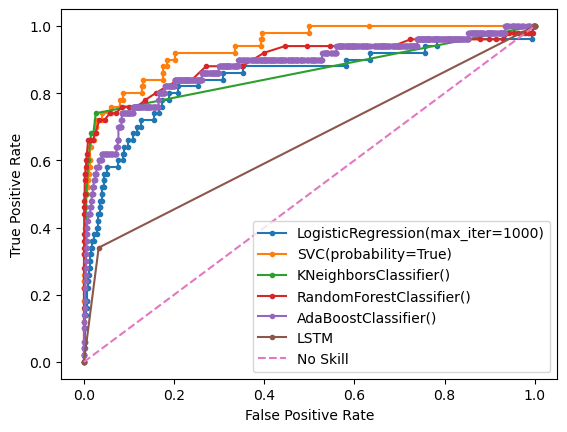

In [322]:
results_blsmote = []
models = [lr, svm, knn, rf, ada]

for m in models:
    m.fit(X_train_blsmote, y_train_blsmote.values.ravel())
    predicted = m.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, predicted)
    results_blsmote.append([acc, rec, auc])
    m_probs = m.predict_proba(X_test)
    m_probs = m_probs[:, 1]
    m_fpr, m_tpr, _ = roc_curve(y_test, m_probs)
    pyplot.plot(m_fpr, m_tpr, marker='.', label=(m))

X_numpy_blsmote = np.expand_dims(X_train_blsmote.values[:,:],axis = 2)
y_numpy_blsmote = y_train_blsmote.values[:]
X_numpy_blsmote_test = np.expand_dims(X_test_blsmote.values[:,:],axis = 2)
y_numpy_blsmote_test = y_test_blsmote.values[:]
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(len(X_train.columns), 1)))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy', 'Recall'])
model.fit(X_numpy_blsmote, y_numpy_blsmote, epochs=6, batch_size=128, validation_data=(X_numpy_blsmote_test, y_numpy_blsmote_test))

X_numpy = np.expand_dims(X_test.values[:],axis = 2)
y_numpy = y_test.values[:]
ypred = model.predict(X_numpy).ravel()
predlabels = [int(p>=0.5) for p in ypred]
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, predlabels)

pyplot.plot(fpr_keras, tpr_keras, marker='.', label=("LSTM"))

ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [303]:
# X_numpy_blsmote = np.expand_dims(X_train_blsmote.values[:,:],axis = 2)
# y_numpy_blsmote = y_train_blsmote.values[:]
# X_numpy_blsmote_test = np.expand_dims(X_test_blsmote.values[:,:],axis = 2)
# y_numpy_blsmote_test = y_test_blsmote.values[:]
# model = Sequential()
# model.add(LSTM(units=64, return_sequences=True, input_shape=(len(X_train.columns), 1)))
# model.add(LSTM(units=128, return_sequences=True))
# model.add(LSTM(units=256, return_sequences=False))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy', 'Recall'])
# model.fit(X_numpy_blsmote, y_numpy_blsmote, epochs=6, batch_size=128, validation_data=(X_numpy_blsmote_test, y_numpy_blsmote_test))

# X_numpy = np.expand_dims(X_test.values[:],axis = 2)
# y_numpy = y_test.values[:]
# ypred = model.predict(X_numpy)
# predlabels = [int(p>=0.5) for p in ypred]
# acc = metrics.accuracy_score(y_test, predlabels)
# rec = metrics.recall_score(y_test, predlabels)
# print("LSTM Accuracy:", acc)
# print("LSTM Recall:", rec)
# cf_matrix = metrics.confusion_matrix(y_test,predlabels)
# print(cf_matrix)
# results_blsmote.append([metrics.accuracy_score(y_test, predicted), metrics.recall_score(y_test, predlabels)])

print(results_blsmote)

[[0.909518888506143, 0.62, 0.7655953343342188], [0.9937995177402686, 0.34, 0.6687873888439775], [0.9823171431852107, 0.68, 0.8320314124032798], [0.8829946032839591, 0.82, 0.8516791777341494], [0.3821334251923298, 0.94, 0.6594560572814412]]


In [272]:
final_results = [[results_no_sample], [results_under], [results_over], [results_smote], [results_adasyn], [results_blsmote]]

In [273]:
final_results

[[[[0.9944884602135722, 0.04],
   [0.994258812722471, 0.0],
   [0.994258812722471, 0.0],
   [0.9972442301067861, 0.52],
   [0.9973590538523367, 0.58]]],
 [[[0.7555402457228155, 0.78],
   [0.7935469055000575, 0.8],
   [0.7819497071994489, 0.82],
   [0.9055000574118728, 0.92],
   [0.8712825812378, 0.98]]],
 [[[0.835457572626019, 0.74],
   [0.99207716155701, 0.4],
   [0.9926512802847629, 0.44],
   [0.9966701113790332, 0.46],
   [0.9900103341370996, 0.82]]],
 [[[0.8485474796187852, 0.76],
   [0.992880927775864, 0.4],
   [0.9702606499023998, 0.76],
   [0.4781260764726145, 0.94],
   [0.11849810540819841, 0.98]]],
 [[[0.8452175909978183, 0.74],
   [0.9924216327936617, 0.34],
   [0.9753128947066253, 0.72],
   [0.6854977609369618, 0.86],
   [0.25777930876105176, 0.96]]],
 [[[0.909518888506143, 0.62],
   [0.9937995177402686, 0.34],
   [0.9823171431852107, 0.68],
   [0.9123894821449076, 0.8],
   [0.3821334251923298, 0.94]]]]

In [127]:
# sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [128]:
# mean0 = final_adasyn[final_adasyn['label'] == 0].sample(30)
# mean1 = final_adasyn[final_adasyn['label'] == 1].sample(30)
# fvalue, pvalue = stats.ttest_ind(mean0['text_distance'], mean1['text_distance'])
# print(fvalue, pvalue)

In [129]:
# pca = PCA(n_components = 5)
# X_train_blsmote = pca.fit_transform(X_train_blsmote)
# X_test_blsmote = pca.transform(X_test_blsmote)
# explained_variance = pca.explained_variance_ratio_
# explained_variance